In [ ]:
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import imutils
cv2.ocl.setUseOpenCL(False)

In [ ]:
import sys
if 'google.colab' in sys.modules:
    import subprocess
    subprocess.call("pip install -U opencv-python".split())
    subprocess.call("wget https://raw.githubusercontent.com/YoniChechik/AI_is_Math/master/c_08_features/left.jpg".split())
    subprocess.call("wget https://raw.githubusercontent.com/YoniChechik/AI_is_Math/master/c_08_features/right.jpg".split())


In [ ]:
a1=cv2.imread('foto1A.jpeg',0)
a2=cv2.imread('foto1B.jpeg',0)
a3=cv2.imread('foto1A.jpeg')
a4=cv2.imread('foto1B.jpeg')


In [ ]:
print(a1)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [ ]:
descriptor = cv2.ORB_create()
# i have used ORB as descriptor

In [ ]:
kpsa1,featuresa1 = descriptor.detectAndCompute(a1,None)
kpsa2,featuresa2 = descriptor.detectAndCompute(a2,None)
#keypoints are usually corner as depecited by harris corner detection

In [ ]:
test1 = cv2.drawKeypoints(a1, kpsa1, None, color=(0,255,255))
test2=cv2.drawKeypoints(a2, kpsa2, None, color=(0,255,255))
#her i have drawn keypoints 

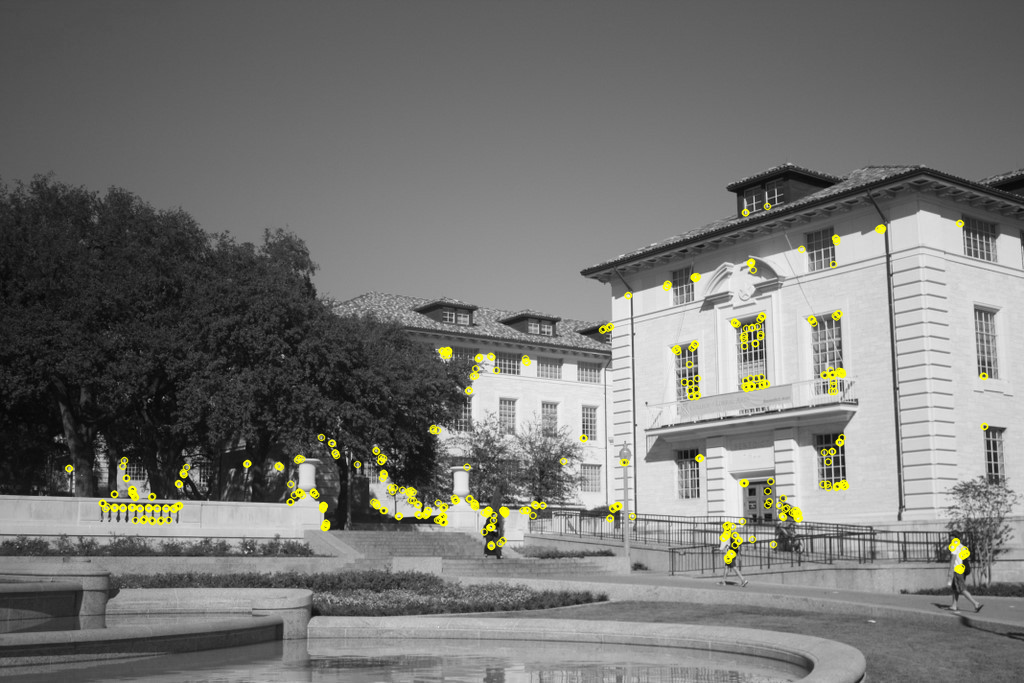

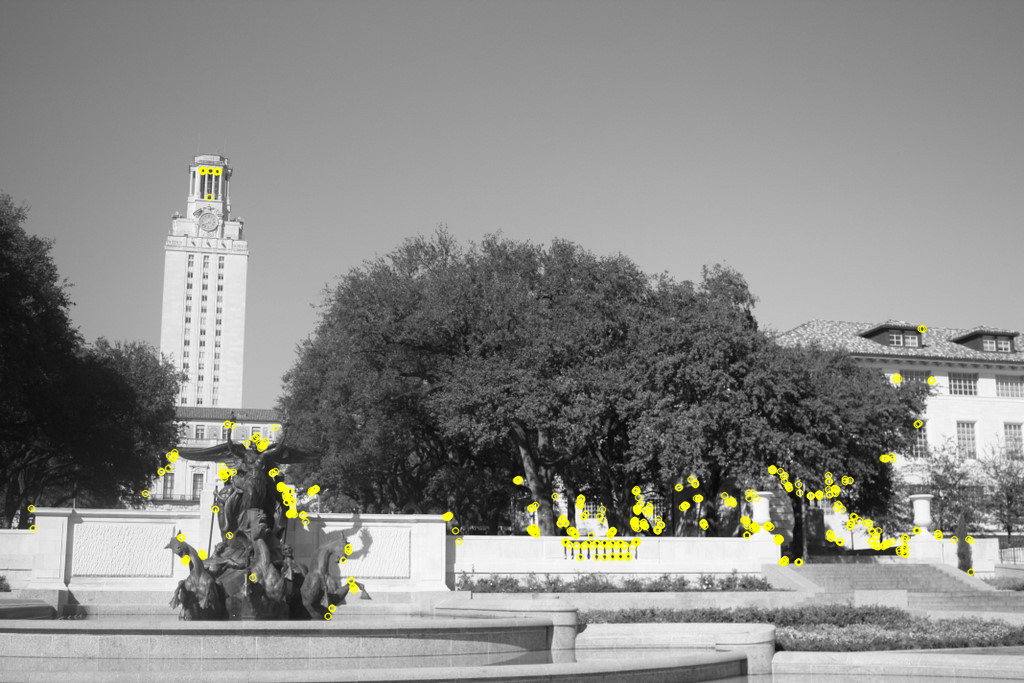

In [ ]:
cv2_imshow(test1)
cv2_imshow(test2)


In [ ]:
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
  #for matching between two images , there were two methods =1)brute force which is computationaly heavy as it checks every route and then select shortest and k-tree algo,i have used bf

In [ ]:
matches = bf.match(featuresa1,featuresa2)
rawMatches = sorted(matches, key = lambda x:x.distance)
print("Raw matches (Brute force):", len(rawMatches))


Raw matches (Brute force): 187


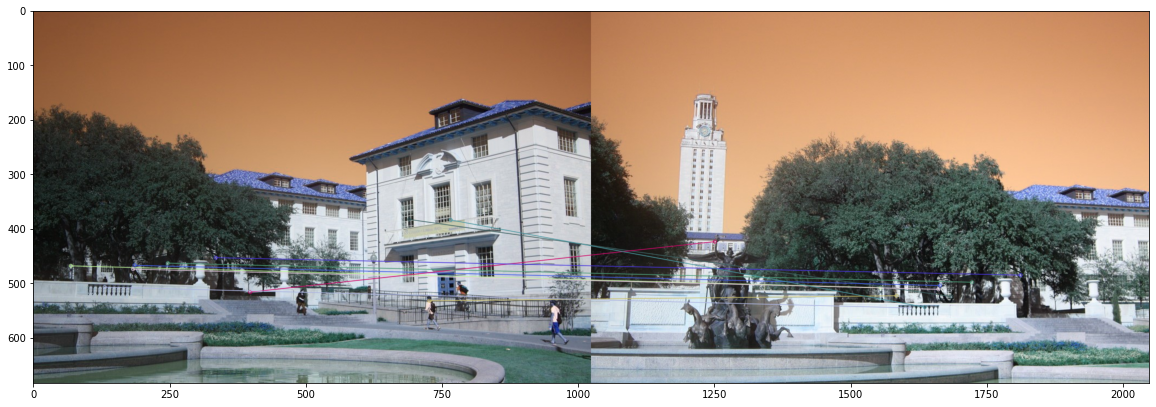

(<matplotlib.image.AxesImage at 0x7fa3d8ed8350>, None)

In [ ]:
img3 = cv2.drawMatches(a3,kpsa1,a4,kpsa2,matches[:10],
                           None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20,10))
plt.imshow(img3),plt.show()

In [ ]:
def getHomography(kpsA, kpsB, featuresA, featuresB, matches, reprojThresh):
    # convert the keypoints to numpy arrays
    kpsA = np.float32([kp.pt for kp in kpsA])
    kpsB = np.float32([kp.pt for kp in kpsB])
    
    if len(matches) > 4:

        # construct the two sets of points
        ptsA = np.float32([kpsA[m.queryIdx] for m in matches])
        ptsB = np.float32([kpsB[m.trainIdx] for m in matches])
        
        # estimate the homography between the sets of points
        (H, status) = cv2.findHomography(ptsA, ptsB, cv2.RANSAC,
            reprojThresh)

        return (matches, H, status)
    else:
        return None

In [ ]:
M = getHomography(kpsa1, kpsa2, featuresa1, featuresa2, matches, reprojThresh=4)
if M is None:
    print("Error!")
(matches, H, status) = M
print(H)
#homography matrix is used for transition of image into various part , for this i have consider scaling the matrix and hence we have to find 8 unknowns and 9th is one

[[ 8.13921333e-01  1.14294138e-01  4.26202835e+02]
 [-1.31963474e-01  9.92691370e-01  5.78470315e+01]
 [-2.05615602e-04  5.10686103e-05  1.00000000e+00]]


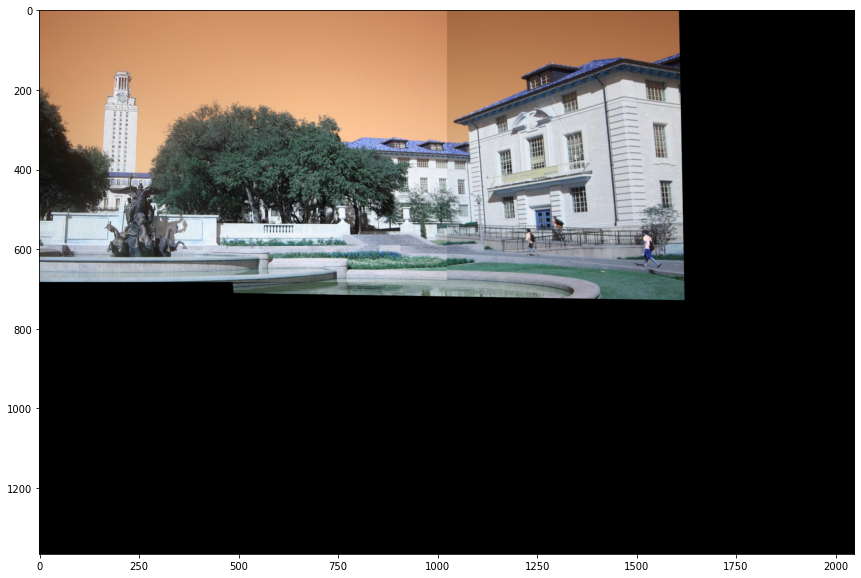

In [ ]:
width = a3.shape[1] + a4.shape[1]
height = a3.shape[0] + a4.shape[0]

result = cv2.warpPerspective(a3, H, (width, height))
result[0:a4.shape[0], 0:a4.shape[1]] = a4

plt.figure(figsize=(20,10))
plt.imshow(result)


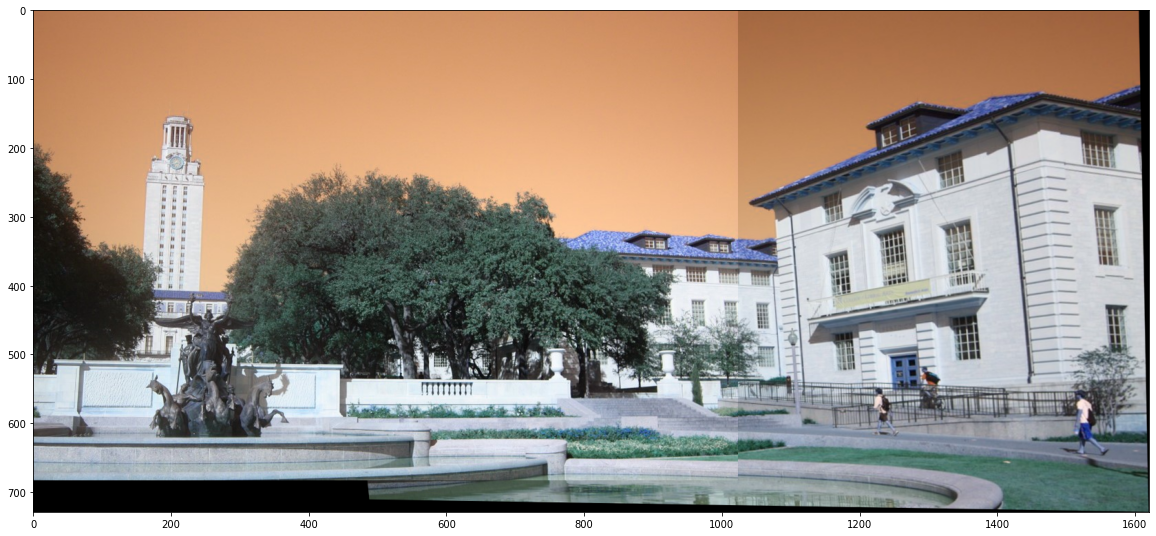

In [ ]:

gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)


c = max(cnts, key=cv2.contourArea)

(x, y, w, h) = cv2.boundingRect(c)


result = result[y:y + h, x:x + w]

plt.figure(figsize=(20,10))
plt.imshow(result)